In [1]:
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import pathlib

In [2]:
preselectionCuts = False
save_plots = False

# Import data

In [3]:
inputMC = '~/data/LHCbMC_2016-2017-2018_MagUpDown_Lb2JPsiL_Ttracks_v12.h5'

In [4]:
tickMC = time.perf_counter()
df_reco = pd.read_hdf(inputMC, key='LHCbMC_Lb')
tockMC = time.perf_counter()
print(f"Monte Carlo imported in {tockMC - tickMC:0.4f} seconds.")
df_reco

Monte Carlo imported in 1.6764 seconds.


,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,DTF_FixJPsiLambda_PIDSubs_p_PY,DTF_FixJPsiLambda_PIDSubs_p_PZ,DTF_FixJPsiLambda_PIDSubs_mum_PX,DTF_FixJPsiLambda_PIDSubs_mum_PY,DTF_FixJPsiLambda_PIDSubs_mum_PZ,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ,TrackType,MC_key
Rec_key,,,,,,,,,,,,,,,,,,,,,
0,0.952388,-0.165336,26.651770,402.777832,-229.470520,5536.814453,0.9524,-0.1653,26.652201,1910.136719,...,-186.566345,5411.963379,-804.469727,-535.944397,22858.960938,1438.071777,1619.347290,23634.302734,T,0
1,0.845292,-0.195122,3.622388,139.395874,322.585419,7428.522461,0.8453,-0.1950,3.620400,481.652618,...,222.666214,4137.976074,-605.608093,594.454895,11170.495117,71.893692,-2873.631348,73489.484375,T,29
2,-0.480003,-0.762014,18.670696,-819.340149,-626.124390,5389.564453,-0.4801,-0.7620,18.671101,-5395.257812,...,-323.442810,2628.927246,4.108163,-790.314697,5651.807129,-5579.078613,-431.151581,23151.667969,T,69
3,1.681797,-2.255294,-36.569271,113.645294,-329.222229,4678.392090,1.6818,-2.2553,-36.569199,7835.708984,...,-1702.511353,24506.517578,8712.822266,-18033.572266,231397.500000,336.531647,-3496.248779,45100.238281,T,119
4,0.824895,-0.252737,74.871048,-100.702072,60.565861,6466.218750,0.8242,-0.2542,74.883598,-74.406654,...,135.662018,8106.856445,-3448.149902,-1045.294434,90591.554688,588.637329,239.301941,10912.332031,T,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366391,0.964920,0.161698,-12.157676,293.129822,39.016293,7097.797363,0.9649,0.1621,-12.151800,3175.616943,...,-18.306223,7767.518555,1504.345581,715.472656,49351.718750,-112.221489,2933.706299,37641.914062,T,8921673
366392,-0.498788,1.215896,21.856564,-176.847626,145.914993,8691.596680,-0.5001,1.2166,21.869101,-2664.720215,...,-50.586430,-2812.631592,-3547.666504,1885.741577,33505.289062,-1337.816284,1466.083374,45027.328125,T,8921702
366393,0.114458,-0.046962,25.276293,-29.465662,-15.364128,949.110657,0.1145,-0.0469,25.275400,-6107.898926,...,-133.646973,15975.192383,-3526.683594,-343.335175,44636.988281,-3534.635254,-3121.734619,91762.195312,T,8921772


In [5]:
def MomentumModulus(px, py, pz):
    return np.sqrt(px**2 + py**2 + pz**2)

def TransverseMomentumModulus(px, py):
    return np.sqrt(px**2 + py**2)

In [6]:
if preselectionCuts:
    JPsi1SPDGMass = 3096.900

    PionPCuts = (MomentumModulus(df_reco['pim_PX'], df_reco['pim_PY'], df_reco['pim_PZ']) > 2000) & (MomentumModulus(df_reco['pim_PX'], df_reco['pim_PY'], df_reco['pim_PZ']) < 5e5)
    ProtonPCuts = (MomentumModulus(df_reco['p_PX'], df_reco['p_PY'], df_reco['p_PZ']) > 10000) & (MomentumModulus(df_reco['p_PX'], df_reco['p_PY'], df_reco['p_PZ']) < 5e5)
    ProtonPTCuts = TransverseMomentumModulus(df_reco['p_PX'], df_reco['p_PY']) > 400
    LambdaMCuts = (df_reco['L_M'] > 600) & (df_reco['L_M'] < 1500)
    LambdaMMCuts = df_reco['L_MM'] < 1500
    LambdaZCuts = (df_reco['L_ENDVERTEX_Z'] > 5500) & (df_reco['L_ENDVERTEX_Z'] < 8500)
    LambdaDiraCuts = (df_reco['L_BPVDIRA'] > 0.9999)
    LambdaBPVIPCHI2Cuts = df_reco['L_BPVIPCHI2'] < 200
    LambdaBPVVDCHI2Cuts = df_reco['L_BPVVDCHI2'] < 2e7
    LambdaChi2Cuts = df_reco['L_VFASPF_CHI2_VDOF'] < 750
    JPsiMCuts = abs(df_reco['Jpsi_M'] - JPsi1SPDGMass) < 90
    LambdaPTCuts = TransverseMomentumModulus(df_reco['L_PX'], df_reco['L_PY']) > 450
    LambdabMCuts = (df_reco['Lb_M'] < 8500)
    LambdabDiraCuts = abs(df_reco['Lb_BPVDIRA']) > 0.99
    LambdabBPVIPCHI2Cuts = df_reco['Lb_BPVIPCHI2'] < 1750
    LambdabChi2Cuts = df_reco['Lb_VFASPF_CHI2_VDOF'] < 150

    #DTFCuts = (df_reco['DTF_FixJPsiLambda_status'] == 'Success')


    df_reco = df_reco.loc[
        PionPCuts &
        ProtonPCuts &
        ProtonPTCuts &
        LambdaMCuts &
        LambdaMMCuts &
        LambdaZCuts &
        LambdaDiraCuts &
        LambdaBPVIPCHI2Cuts &
        LambdaBPVVDCHI2Cuts &
        LambdaChi2Cuts &
        JPsiMCuts &
        LambdaPTCuts &
        LambdabMCuts &
        LambdabDiraCuts &
        LambdabBPVIPCHI2Cuts &
        LambdabChi2Cuts
    ]

In [7]:
## This only contains proton-pim decays
df_lambdab = df_reco.loc[df_reco['p_ID'] == 2212]
## And this only contains antiproton-pip decays
df_antilambdab = df_reco.loc[df_reco['p_ID'] == -2212]

# Search for asymmetries

## Plot settings

In [8]:
## Create plots directory, if missing
plotsDirectory = '/home/adegenna/vertex-reconstruction-studies/plots/decay_reconsutrction_asymmetry_analysis/'
pathlib.Path(plotsDirectory).mkdir(parents=True, exist_ok=True)

## Colors
fullColor = 'grey'
matterColor = 'tab:red'
antimatterColor = 'tab:green'

In [9]:
def PlotSingleHistogram(
    dataCategory,
    feature,
    featureAxisLabel,
    featurePlotTitle,
    scale,
    binning,
    boundaries,
    scientificNotationLabel
):
    if dataCategory == 'full':
        variables = df_reco[feature]
        subtitle = "($\Lambda_b$ + anti-$\Lambda_b$ decays)"
        customColor = fullColor
        filePrefix = 'all'
    elif dataCategory == 'matter':
        variables = df_lambdab[feature]
        subtitle = "(Only $\Lambda_b$ decays)"
        customColor = matterColor
        filePrefix = 'matter'
    elif dataCategory == 'antimatter':
        variables = df_antilambdab[feature]
        subtitle = "(Only anti-$\Lambda_b$ decays)"
        customColor = antimatterColor
        filePrefix = 'antimatter'
    
    plt.hist(variables,
             bins=binning,
             range=boundaries,
             histtype='stepfilled',
             edgecolor=customColor,
             color=mcolors.to_rgba(customColor, alpha=0.1)
    )
    plt.grid()
    plt.xlabel(featureAxisLabel)
    plt.title(featurePlotTitle + "\n" + subtitle)
    plt.yscale(scale)
    plt.ylabel("Events")
    if scientificNotationLabel:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    if save_plots:
        plt.savefig(plotsDirectory + filePrefix + "_" + featureToPlot + '.pdf', bbox_inches='tight')
    plt.show()
    
def PlotOverlappingHistograms(
    feature,
    featureAxisLabel,
    featurePlotTitle,
    scale,
    binning,
    boundaries,
    scientificNotationLabel
):   
    plt.hist(df_lambdab[feature],
             bins=binning,
             range=boundaries,
             label="$\Lambda_b$ decays",
             histtype='stepfilled',
             edgecolor=matterColor,
             color=mcolors.to_rgba(matterColor, alpha=0.05),
             density=False
    )
    
    plt.hist(df_antilambdab[feature],
             bins=binning,
             range=boundaries,
             label="Anti-$\Lambda_b$ decays",
             histtype='stepfilled',
             edgecolor=antimatterColor,
             color=mcolors.to_rgba(antimatterColor, alpha=0.05),
             density=False
    )    
    
    plt.grid()
    plt.xlabel(featureAxisLabel)
    plt.title(featurePlotTitle + "\n" + "($\Lambda_b$ vs. anti-$\Lambda_b$ decays)")
    plt.yscale(scale)
    plt.ylabel("Events")
    plt.legend()
    if scientificNotationLabel:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    if save_plots:
        plt.savefig(plotsDirectory + "matter-vs-antimatter_" + featureToPlot + '.pdf', bbox_inches='tight')
    plt.show()

## Proton momentum

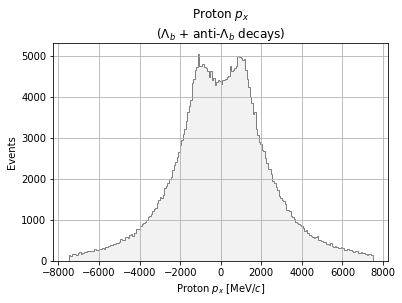

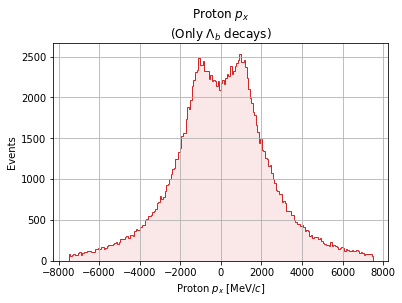

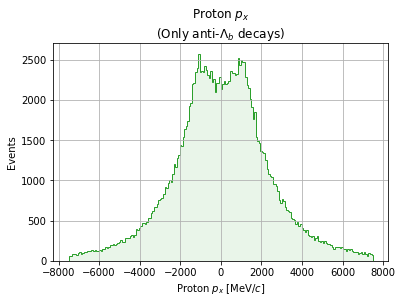

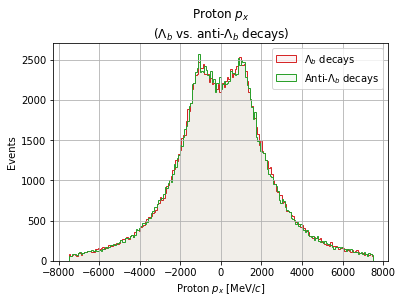

In [10]:
plotArgs = {
    "feature": 'p_PX',
    "featureAxisLabel": "Proton $p_x$ [MeV/$c$]",
    "featurePlotTitle": "Proton $p_x$",
    "scale": "linear",
    "binning": 200,
    "boundaries": (-7500,7500),
    "scientificNotationLabel": False    
}

for dataset in ['full', 'matter', 'antimatter']:
    PlotSingleHistogram(dataset, **plotArgs)
PlotOverlappingHistograms(**plotArgs)

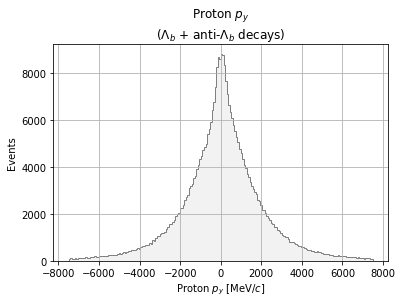

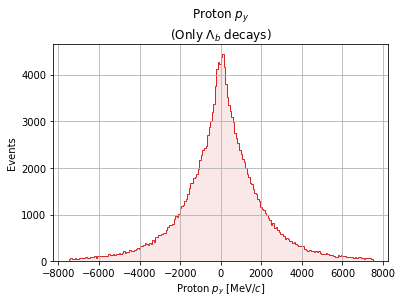

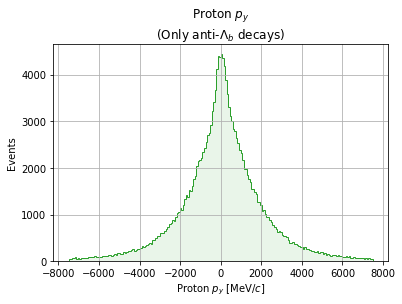

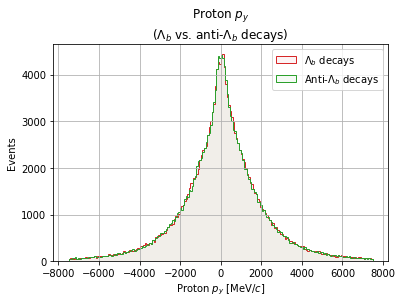

In [11]:
plotArgs = {
    "feature": 'p_PY',
    "featureAxisLabel": "Proton $p_y$ [MeV/$c$]",
    "featurePlotTitle": "Proton $p_y$",
    "scale": "linear",
    "binning": 200,
    "boundaries": (-7500,7500),
    "scientificNotationLabel": False    
}

for dataset in ['full', 'matter', 'antimatter']:
    PlotSingleHistogram(dataset, **plotArgs)
PlotOverlappingHistograms(**plotArgs)

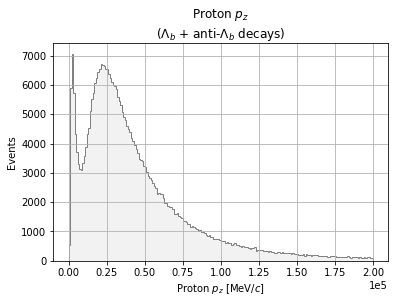

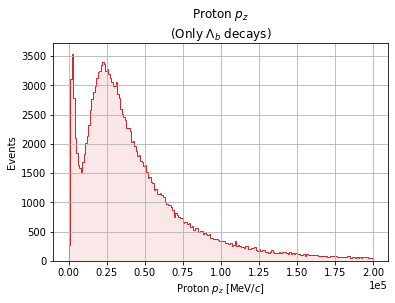

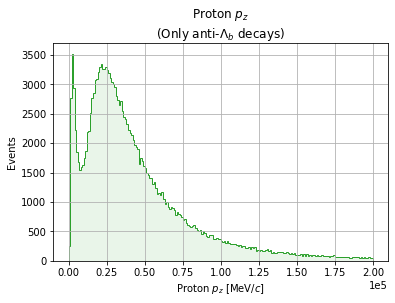

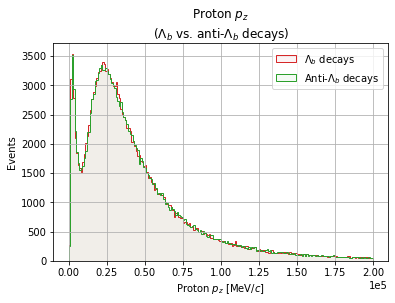

In [12]:
plotArgs = {
    "feature": 'p_PZ',
    "featureAxisLabel": "Proton $p_z$ [MeV/$c$]",
    "featurePlotTitle": "Proton $p_z$",
    "scale": "linear",
    "binning": 200,
    "boundaries": (0,2e5),
    "scientificNotationLabel": True    
}

for dataset in ['full', 'matter', 'antimatter']:
    PlotSingleHistogram(dataset, **plotArgs)
PlotOverlappingHistograms(**plotArgs)

## Pion momentum

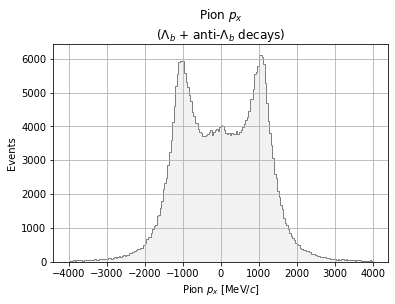

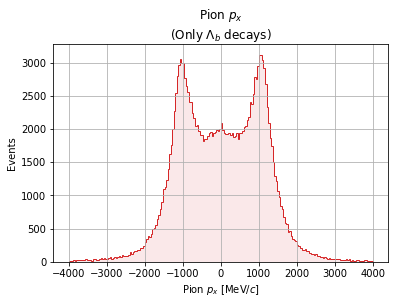

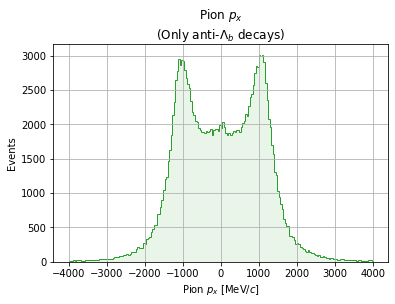

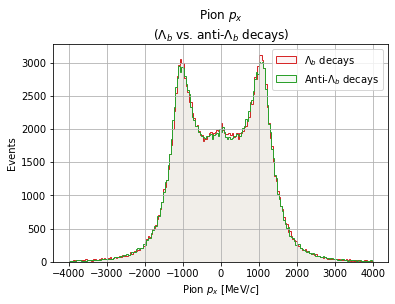

In [13]:
plotArgs = {
    "feature": 'pim_PX',
    "featureAxisLabel": "Pion $p_x$ [MeV/$c$]",
    "featurePlotTitle": "Pion $p_x$",
    "scale": "linear",
    "binning": 200,
    "boundaries": (-4000,4000),
    "scientificNotationLabel": False    
}

for dataset in ['full', 'matter', 'antimatter']:
    PlotSingleHistogram(dataset, **plotArgs)
PlotOverlappingHistograms(**plotArgs)

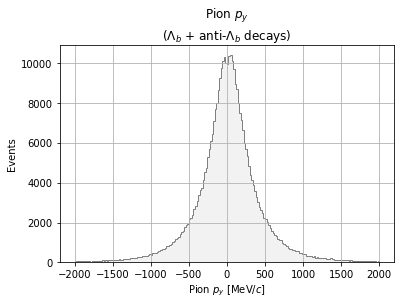

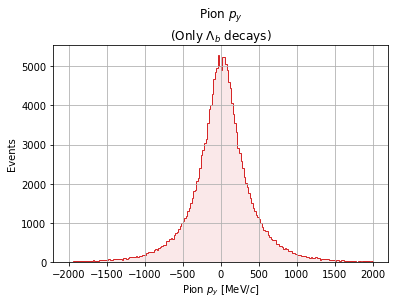

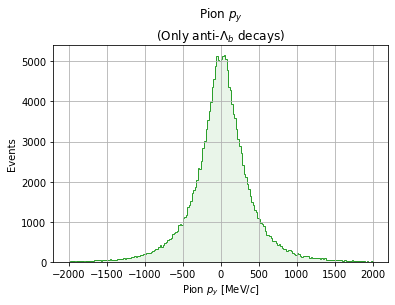

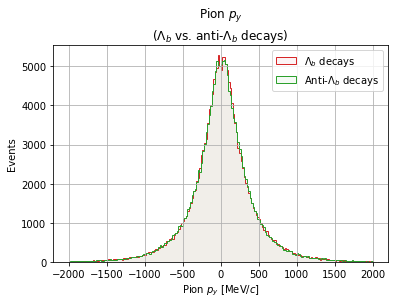

In [14]:
plotArgs = {
    "feature": 'pim_PY',
    "featureAxisLabel": "Pion $p_y$ [MeV/$c$]",
    "featurePlotTitle": "Pion $p_y$",
    "scale": "linear",
    "binning": 200,
    "boundaries": (-2000,2000),
    "scientificNotationLabel": False    
}

for dataset in ['full', 'matter', 'antimatter']:
    PlotSingleHistogram(dataset, **plotArgs)
PlotOverlappingHistograms(**plotArgs)

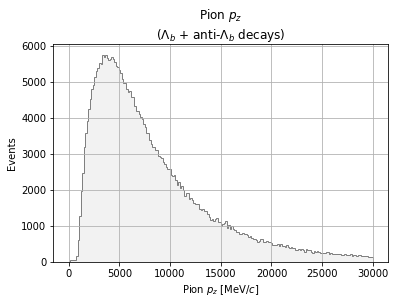

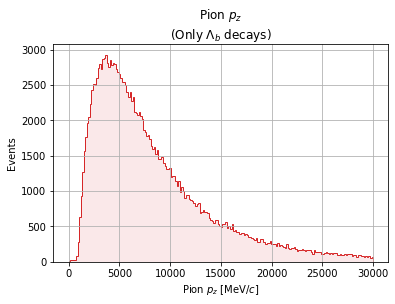

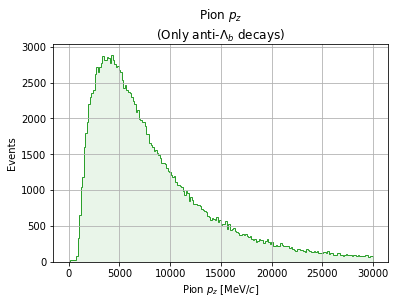

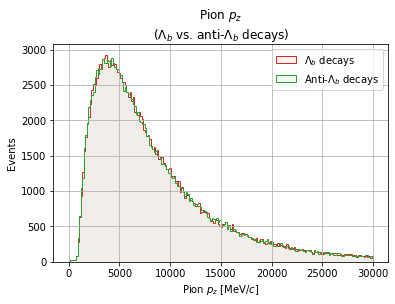

In [15]:
plotArgs = {
    "feature": 'pim_PZ',
    "featureAxisLabel": "Pion $p_z$ [MeV/$c$]",
    "featurePlotTitle": "Pion $p_z$",
    "scale": "linear",
    "binning": 200,
    "boundaries": (0,3e4),
    "scientificNotationLabel": False    
}

for dataset in ['full', 'matter', 'antimatter']:
    PlotSingleHistogram(dataset, **plotArgs)
PlotOverlappingHistograms(**plotArgs)